In [3]:
# The libraries that I am using
import sys
import sklearn
import keras
import pandas
import numpy

print('Python: {0}'.format(sys.version))
print("Keras: {0}".format(keras.__version__))
print("Pandas: {0}".format(pandas.__version__))
print("Sklearn: {0}".format(sklearn.__version__))
print("Numpy: {0}".format(numpy.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Keras: 2.3.1
Pandas: 1.0.1
Sklearn: 0.22.1
Numpy: 1.18.1


In [4]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Read in the Dataset csv file using pandas
dataFrame = pd.read_csv('weatherAUS.csv')

# The Data, rows define entries while the columns define the parameters
rows, columns = dataFrame.shape
print("Data Set Dimensions:  Rows = {1} | Columns = {0}".format(columns, rows))

# Replace Final results from Yes/No to 1/0 respectively
dataFrame['RainTomorrow'].replace('No', 0, inplace=True)
dataFrame['RainTomorrow'].replace('Yes', 1, inplace=True)
dataFrame['RainToday'].replace('No', 0, inplace=True)
dataFrame['RainToday'].replace('Yes', 1, inplace=True)

# Change Wind Gusts/Directions to have numeric values
dataFrame['WindGustDir'].replace('E', 1, inplace=True)
dataFrame['WindDir9am'].replace('E', 1, inplace=True)
dataFrame['WindDir3pm'].replace('E', 1, inplace=True)
dataFrame['WindGustDir'].replace('ENE', 2, inplace=True)
dataFrame['WindDir9am'].replace('ENE', 2, inplace=True)
dataFrame['WindDir3pm'].replace('ENE', 2, inplace=True)
dataFrame['WindGustDir'].replace('ESE', 3, inplace=True)
dataFrame['WindDir9am'].replace('ESE', 3, inplace=True)
dataFrame['WindDir3pm'].replace('ESE', 3, inplace=True)
dataFrame['WindGustDir'].replace('N', 4, inplace=True)
dataFrame['WindDir9am'].replace('N', 4, inplace=True)
dataFrame['WindDir3pm'].replace('N', 4, inplace=True)
dataFrame['WindGustDir'].replace('NE', 5, inplace=True)
dataFrame['WindDir9am'].replace('NE', 5, inplace=True)
dataFrame['WindDir3pm'].replace('NE', 5, inplace=True)
dataFrame['WindGustDir'].replace('NNE', 6, inplace=True)
dataFrame['WindDir9am'].replace('NNE', 6, inplace=True)
dataFrame['WindDir3pm'].replace('NNE', 6, inplace=True)
dataFrame['WindGustDir'].replace('NNW', 7, inplace=True)
dataFrame['WindDir9am'].replace('NNW', 7, inplace=True)
dataFrame['WindDir3pm'].replace('NNW', 7, inplace=True)
dataFrame['WindGustDir'].replace('NW', 8, inplace=True)
dataFrame['WindDir9am'].replace('NW', 8, inplace=True)
dataFrame['WindDir3pm'].replace('NW', 8, inplace=True)
dataFrame['WindGustDir'].replace('S', 9, inplace=True)
dataFrame['WindDir9am'].replace('S', 9, inplace=True)
dataFrame['WindDir3pm'].replace('S', 9, inplace=True)
dataFrame['WindGustDir'].replace('SE', 10, inplace=True)
dataFrame['WindDir9am'].replace('SE', 10, inplace=True)
dataFrame['WindDir3pm'].replace('SE', 10, inplace=True)
dataFrame['WindGustDir'].replace('SSE', 11, inplace=True)
dataFrame['WindDir9am'].replace('SSE', 11, inplace=True)
dataFrame['WindDir3pm'].replace('SSE', 11, inplace=True)
dataFrame['WindGustDir'].replace('SSW', 12, inplace=True)
dataFrame['WindDir9am'].replace('SSW', 12, inplace=True)
dataFrame['WindDir3pm'].replace('SSW', 12, inplace=True)
dataFrame['WindGustDir'].replace('SW', 13, inplace=True)
dataFrame['WindDir9am'].replace('SW', 13, inplace=True)
dataFrame['WindDir3pm'].replace('SW', 13, inplace=True)
dataFrame['WindGustDir'].replace('W', 14, inplace=True)
dataFrame['WindDir9am'].replace('W', 14, inplace=True)
dataFrame['WindDir3pm'].replace('W', 14, inplace=True)
dataFrame['WindGustDir'].replace('WNW', 15, inplace=True)
dataFrame['WindDir9am'].replace('WNW', 15, inplace=True)
dataFrame['WindDir3pm'].replace('WNW', 15, inplace=True)
dataFrame['WindGustDir'].replace('WSW', 16, inplace=True)
dataFrame['WindDir9am'].replace('WSW', 16, inplace=True)
dataFrame['WindDir3pm'].replace('WSW', 16, inplace=True)

# Add all locations to a set
locationSet = set()
locationIndex = 0
for location in dataFrame['Location']:
    locationSet.add(location)

# Replace every location with a consecutive number
locationIndex = 0
for location in locationSet:
    dataFrame['Location'].replace(location, locationIndex, inplace=True)
    locationIndex += 1

# Delete all rows that contain NA values
dataFrame.dropna(inplace=True)

# Shuffle data so it is not sorted by location
dataFrame = shuffle(dataFrame)

# A snapshot of what our data looks like
dataFrame[0:10]



Data Set Dimensions:  Rows = 142193 | Columns = 24


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
86001,2012-02-20,7,23.1,30.1,31.8,8.2,5.3,11.0,24.0,11.0,...,70.0,1013.0,1009.5,7.0,6.0,26.9,29.2,1.0,0.0,0
83201,2012-09-28,28,13.8,25.5,0.0,4.8,10.8,5.0,28.0,4.0,...,59.0,1019.9,1014.8,1.0,1.0,22.5,23.9,0.0,0.0,0
85553,2010-10-30,7,20.5,30.1,0.0,8.8,11.1,3.0,37.0,11.0,...,53.0,1014.1,1010.8,2.0,3.0,27.3,29.4,0.0,0.0,0
62780,2009-02-14,40,10.5,27.3,0.0,5.8,12.3,11.0,41.0,14.0,...,26.0,1022.8,1019.3,0.0,0.0,16.0,26.4,0.0,0.0,0
72802,2009-02-16,27,15.2,23.7,0.0,6.8,12.1,10.0,37.0,3.0,...,61.0,1019.7,1017.1,6.0,0.0,17.4,22.1,0.0,0.0,0
103016,2009-02-08,42,21.7,35.3,0.0,24.0,12.1,12.0,67.0,11.0,...,25.0,1009.8,1009.5,1.0,1.0,22.1,34.3,0.0,0.0,0
34330,2013-05-05,19,12.6,18.1,0.0,6.4,9.1,9.0,43.0,16.0,...,42.0,1025.2,1022.3,6.0,1.0,15.0,17.8,0.0,0.0,0
129782,2017-04-07,20,10.7,25.0,0.0,3.0,8.8,7.0,65.0,4.0,...,24.0,1022.5,1016.7,7.0,8.0,15.2,24.2,0.0,0.0,0
91275,2010-02-26,18,23.7,31.2,40.6,8.6,6.7,1.0,54.0,10.0,...,76.0,1013.1,1009.8,7.0,7.0,26.6,29.2,1.0,48.6,1
99359,2015-10-08,48,2.3,21.8,0.0,3.2,9.9,3.0,39.0,1.0,...,40.0,1035.4,1030.3,0.0,1.0,10.3,20.8,0.0,0.0,0


In [5]:
# Show some stats about our data file
dataFrame.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,23.585980,13.464770,24.219206,2.130397,5.503135,7.735626,8.485537,40.877366,8.122935,8.574424,...,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,2.346960,0.220259
std,14.317428,6.416689,6.970676,7.014822,3.696282,3.758153,4.792305,13.335232,4.660823,4.711700,...,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,8.731885,0.414425
min,2.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000,0.000000
25%,14.000000,8.600000,18.700000,0.000000,2.800000,5.000000,4.000000,31.000000,4.000000,4.000000,...,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000,0.000000
50%,21.000000,13.200000,23.900000,0.000000,5.000000,8.600000,9.000000,39.000000,8.000000,9.000000,...,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000,0.000000
75%,40.000000,18.400000,29.700000,0.600000,7.400000,10.700000,13.000000,48.000000,12.000000,13.000000,...,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.600000,0.000000
max,48.000000,31.400000,48.100000,206.200000,81.200000,14.500000,16.000000,124.000000,16.000000,16.000000,...,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,367.600000,1.000000


In [6]:
# Convert our dataFrame to a numpy array
setOfData = dataFrame.values
print(setOfData)
print(setOfData.shape)

[['2012-02-20' 7 23.1 ... 1.0 0.0 0]
 ['2012-09-28' 28 13.8 ... 0.0 0.0 0]
 ['2010-10-30' 7 20.5 ... 0.0 0.0 0]
 ...
 ['2011-03-16' 48 7.2 ... 0.0 0.0 0]
 ['2010-12-06' 19 19.6 ... 1.0 0.8 0]
 ['2009-01-26' 44 19.6 ... 0.0 0.0 0]]
(56420, 24)


In [7]:
# Splitting the dataset into input and output (inData, outData respectively)
inData = setOfData[:,1:23] # Do not choose the date or location column
outData = setOfData[:,23]
print(inData[5:10])
print(outData[5:10])



[[42 21.7 35.3 0.0 24.0 12.1 12.0 67.0 11.0 11.0 37.0 31.0 54.0 25.0
  1009.8 1009.5 1.0 1.0 22.1 34.3 0.0 0.0]
 [19 12.6 18.1 0.0 6.4 9.1 9.0 43.0 16.0 11.0 11.0 19.0 58.0 42.0 1025.2
  1022.3 6.0 1.0 15.0 17.8 0.0 0.0]
 [20 10.7 25.0 0.0 3.0 8.8 7.0 65.0 4.0 4.0 11.0 31.0 63.0 24.0 1022.5
  1016.7 7.0 8.0 15.2 24.2 0.0 0.0]
 [18 23.7 31.2 40.6 8.6 6.7 1.0 54.0 10.0 3.0 33.0 30.0 81.0 76.0 1013.1
  1009.8 7.0 7.0 26.6 29.2 1.0 48.6]
 [48 2.3 21.8 0.0 3.2 9.9 3.0 39.0 1.0 3.0 26.0 11.0 73.0 40.0 1035.4
  1030.3 0.0 1.0 10.3 20.8 0.0 0.0]]
[0 0 0 1 0]


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X=inData)
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [9]:
# Get the training data displayed and normalized
inStandardized = scaler.transform(inData)

data = pd.DataFrame(inStandardized)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,...,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04,5.642000e+04
mean,-8.056890e-17,2.219423e-16,3.626734e-16,-1.928524e-15,1.212912e-16,3.531068e-16,-2.294513e-16,-1.121759e-15,-1.298028e-16,4.271781e-16,...,-1.001975e-16,8.549819e-17,4.202553e-15,2.146056e-14,3.214695e-16,-2.014714e-15,6.301431e-17,-3.205998e-17,-1.324967e-15,-7.500922e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.507685e+00,-3.142579e+00,-2.886289e+00,-3.037021e-01,-1.488843e+00,-2.058376e+00,-1.562005e+00,-2.390483e+00,-1.528270e+00,-1.607592e+00,...,-3.558239e+00,-2.455925e+00,-5.317403e+00,-5.486320e+00,-1.516445e+00,-1.634357e+00,-2.878373e+00,-2.780718e+00,-5.324452e-01,-2.687829e-01
25%,-6.695382e-01,-7.581500e-01,-7.917818e-01,-3.037021e-01,-7.313184e-01,-7.279240e-01,-9.359957e-01,-7.407036e-01,-8.846016e-01,-9.708734e-01,...,-5.873737e-01,-7.229829e-01,-6.570142e-01,-6.834078e-01,-1.158937e+00,-8.788497e-01,-7.772553e-01,-7.767640e-01,-5.324452e-01,-2.687829e-01
50%,-1.806192e-01,-4.126302e-02,-4.579309e-02,-3.037021e-01,-1.361205e-01,2.300018e-01,1.073528e-01,-1.407837e-01,-2.637650e-02,9.032404e-02,...,6.081509e-02,1.970677e-02,-5.717731e-03,-1.391092e-02,2.710968e-01,2.544113e-01,-6.165730e-02,-4.539370e-02,-5.324452e-01,-2.687829e-01
75%,1.146447e+00,7.691310e-01,7.862713e-01,-2.181681e-01,5.131863e-01,7.887918e-01,9.420317e-01,5.341262e-01,8.318486e-01,9.392820e-01,...,7.090039e-01,6.633712e-01,6.600520e-01,6.701403e-01,9.861134e-01,1.009919e+00,7.757447e-01,7.591136e-01,-5.324452e-01,-2.000686e-01
max,1.705211e+00,2.795116e+00,3.425924e+00,2.909146e+01,2.047937e+01,1.799936e+00,1.568041e+00,6.233365e+00,1.690074e+00,1.576000e+00,...,1.843334e+00,2.495339e+00,3.352078e+00,3.508225e+00,1.343622e+00,1.765426e+00,3.227049e+00,3.421301e+00,1.878128e+00,4.183017e+01


In [10]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [123]:
# An example of what a model can look like
def initalizeModel():
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

deepLearningModel = initalizeModel()
print(deepLearningModel.summary())
    

Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_385 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_386 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_387 (Dense)            (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
from keras.layers import Dense, Dropout, BatchNormalization
def initalizeModel():
    # Get sequenctial keras model
    model = Sequential()
    
    # Input Layer
    model.add(Dense(128, input_dim = 22, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Hidden Layer 1
    model.add(Dense(64, input_dim = 128, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    #  Hidden Layer 2
    model.add(Dense(32, input_dim = 64, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Output Layer
    model.add(Dense(1, input_dim = 32, activation='sigmoid'))
    
    # Set the learning rate
    adam = Adam(lr = 0.0008)
    
    # Compile the Model
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model


# Defining a random seed
randomSeed = 2
np.random.seed(randomSeed)

model = KerasClassifier(build_fn = initalizeModel, verbose = 1) 

#define grid search parameters
batch_size = [2] # number of steps the moBadels should look at
epochs = [2] # how times to run through

# make a dictionary of grid seacrh params
parameterGrid = dict(batch_size=batch_size, epochs=epochs)


# Build and Fit
grid = GridSearchCV(estimator = model, param_grid = parameterGrid, cv = KFold(random_state= randomSeed), refit = True, verbose = 10)

grid_results = grid.fit(inStandardized, outData)

# Display Results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))



C:\Users\behnk\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] batch_size=2, epochs=2 ..........................................
Epoch 1/2
45136/45136 [==============================] - 243s 5ms/step - loss: 0.4659 - accuracy: 0.7961
Epoch 2/2
11284/11284 [==============================] - 43s 4ms/step
[CV] .............. batch_size=2, epochs=2, score=0.834, total= 9.2min
[CV] batch_size=2, epochs=2 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.1min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 274s 6ms/step - loss: 0.4638 - accuracy: 0.8001
Epoch 2/2
11284/11284 [==============================] - 46s 4ms/step
[CV] .............. batch_size=2, epochs=2, score=0.833, total=10.0min
[CV] batch_size=2, epochs=2 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 19.1min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 248s 5ms/step - loss: 0.4636 - accuracy: 0.7978
Epoch 2/2
11284/11284 [==============================] - 44s 4ms/step
[CV] .............. batch_size=2, epochs=2, score=0.842, total= 9.8min
[CV] batch_size=2, epochs=2 ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 28.9min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 258s 6ms/step - loss: 0.4643 - accuracy: 0.7974
Epoch 2/2
11284/11284 [==============================] - 46s 4ms/step
[CV] .............. batch_size=2, epochs=2, score=0.851, total= 9.7min
[CV] batch_size=2, epochs=2 ..........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 38.6min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 298s 7ms/step - loss: 0.4562 - accuracy: 0.80920s - loss: 0.4563 - accuracy: 
Epoch 2/2
11284/11284 [==============================] - 44s 4ms/step
[CV] .............. batch_size=2, epochs=2, score=0.853, total=10.4min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 49.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 49.0min finished


Epoch 1/2
56420/56420 [==============================] - 313s 6ms/step - loss: 0.4500 - accuracy: 0.8113
Epoch 2/2
56420/56420 [==============================] - 327s 6ms/step - loss: 0.4175 - accuracy: 0.8411
Best: 0.8425203800201416, using {'batch_size': 2, 'epochs': 2}
0.8425203800201416 (0.008076475375438569) with: {'batch_size': 2, 'epochs': 2}


In [87]:
# Get some detailed reuslts
from sklearn.metrics import classification_report, accuracy_score

predictions = grid.predict(inStandardized)
blankList = []
for element in predictions:
    for value in element:
        blankList.append(value)
blankList = np.array(blankList)
print("Actual Data: {0}".format(outData[:20]))
print("Predictions: {0}".format(blankList[:20]))
print("Overall Accuracy Score: {0}".format(accuracy_score(outData, blankList)))
print()
print("               Classification Report")
print("=====================================================")
print(classification_report(outData, blankList))
print("=====================================================")

56420/56420 [==============================] - 212s 4ms/step
Actual Data: [0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0]
Predictions: [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0]
Overall Accuracy Score: 0.8466855724920241

               Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     43993
           1       1.00      0.30      0.47     12427

    accuracy                           0.85     56420
   macro avg       0.92      0.65      0.69     56420
weighted avg       0.87      0.85      0.81     56420



In [90]:
# Optimize Droprate and Learning Rate
from keras.layers import Dense, Dropout, BatchNormalization
def initalizeModel(learn_rate, dropout_rate):
    # Get sequenctial keras model
    model = Sequential()
    
    # Input Layer
    model.add(Dense(128, input_dim = 22, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Hidden Layer 1
    model.add(Dense(64, input_dim = 128, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    #  Hidden Layer 2
    model.add(Dense(32, input_dim = 64, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output Layer
    model.add(Dense(1, input_dim = 32, activation='sigmoid'))
    
    # Set the learning rate
    adam = Adam(lr = learn_rate)
    
    # Compile the Model
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model


# Defining a random seed
randomSeed = 2
np.random.seed(randomSeed)

model = KerasClassifier(build_fn = initalizeModel, epochs = 2, batch_size = 2, verbose = 1) 

learn_rate = [0.0001, 0.001, 0.01]
dropout_rate = [0.0, 0.25, 0.5]

# make a dictionary of grid seacrh params
parameterGrid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)


# Build and Fit
grid = GridSearchCV(estimator = model, param_grid = parameterGrid, cv = KFold(random_state= randomSeed), refit = True, verbose = 10)

grid_results = grid.fit(inStandardized, outData)

# Result Display
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))



C:\Users\behnk\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learn_rate=0.0001 .............................
Epoch 1/2
45136/45136 [==============================] - 325s 7ms/step - loss: 0.3935 - accuracy: 0.8546
Epoch 2/2
11284/11284 [==============================] - 56s 5ms/step
[CV] . dropout_rate=0.0, learn_rate=0.0001, score=0.973, total=12.5min
[CV] dropout_rate=0.0, learn_rate=0.0001 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.5min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 315s 7ms/step - loss: 0.3933 - accuracy: 0.8542
Epoch 2/2
11284/11284 [==============================] - 63s 6ms/step
[CV] . dropout_rate=0.0, learn_rate=0.0001, score=0.971, total=12.3min
[CV] dropout_rate=0.0, learn_rate=0.0001 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 24.9min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 329s 7ms/step - loss: 0.4074 - accuracy: 0.8477
Epoch 2/2
11284/11284 [==============================] - 60s 5ms/step
[CV] . dropout_rate=0.0, learn_rate=0.0001, score=0.922, total=13.0min
[CV] dropout_rate=0.0, learn_rate=0.0001 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 37.9min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 335s 7ms/step - loss: 0.4050 - accuracy: 0.8470
Epoch 2/2
11284/11284 [==============================] - 63s 6ms/step
[CV] . dropout_rate=0.0, learn_rate=0.0001, score=0.951, total=13.2min
[CV] dropout_rate=0.0, learn_rate=0.0001 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 51.1min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 322s 7ms/step - loss: 0.4081 - accuracy: 0.8431
Epoch 2/2
11284/11284 [==============================] - 59s 5ms/step
[CV] . dropout_rate=0.0, learn_rate=0.0001, score=0.939, total=12.3min
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 63.5min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 371s 8ms/step - loss: 0.3939 - accuracy: 0.8600
Epoch 2/2
11284/11284 [==============================] - 59s 5ms/step
[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.807, total=13.3min
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 76.7min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 330s 7ms/step - loss: 0.3869 - accuracy: 0.8612
Epoch 2/2
11284/11284 [==============================] - 57s 5ms/step
[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.851, total=12.9min
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 89.6min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 338s 7ms/step - loss: 0.3812 - accuracy: 0.8644
Epoch 2/2
11284/11284 [==============================] - 60s 5ms/step
[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.868, total=13.3min
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 102.9min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 349s 8ms/step - loss: 0.3933 - accuracy: 0.8620
Epoch 2/2
11284/11284 [==============================] - 63s 6ms/step
[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.870, total=15.1min
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 118.0min remaining:    0.0s


Epoch 1/2
45136/45136 [==============================] - 340s 8ms/step - loss: 0.3926 - accuracy: 0.8592
Epoch 2/2
11284/11284 [==============================] - 63s 6ms/step
[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.859, total=13.5min
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................
Epoch 1/2
45136/45136 [==============================] - 361s 8ms/step - loss: 0.4831 - accuracy: 0.7763: 1:03 - loss: 0.4836 -  - ETA: 55s - loss: 0.4838 - a - ETA: 55s - loss: 0.4839 - - ETA: 47s - loss: 0.4834 - ETA - ETA: 44s - loss: 0.4836 - accuracy: 0.7 -  - ETA: - ETA: 39s - loss: 0.4838 - a - ETA: 35s - loss: 0.4837 - accuracy: 0.7 - ETA: 35s  - ETA: 34 - E - ETA: 27s  - ETA: 25s - loss: 0.4826 - accuracy: 0.777 - ETA: 25s - loss: 0.4826 - accu - ETA: 24s - loss: 0.4826 - accurac - ETA - ETA: 22s - loss: 0.4826 - accuracy: 0.777 - ETA: 22s - loss: 0.4826 - ac - ETA: 21s - loss - ETA: 17s - loss: 0.4821 - accura - ETA: 17s - loss: 0.4821 - accuracy: 0.777 - ETA: 17s 

11284/11284 [==============================] - 82s 7ms/step
[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.792, total=16.5min
[CV] dropout_rate=0.25, learn_rate=0.0001 ............................
Epoch 1/2
45136/45136 [==============================] - 416s 9ms/step - loss: 0.4671 - accuracy: 0.7960
Epoch 2/2
11284/11284 [==============================] - 64s 6ms/step
[CV]  dropout_rate=0.25, learn_rate=0.0001, score=0.902, total=15.4min
[CV] dropout_rate=0.25, learn_rate=0.0001 ............................
Epoch 1/2
45136/45136 [==============================] - 460s 10ms/step - loss: 0.4773 - accuracy: 0.7888
Epoch 2/2
11284/11284 [==============================] - 69s 6ms/step
[CV]  dropout_rate=0.25, learn_rate=0.0001, score=0.869, total=16.6min
[CV] dropout_rate=0.25, learn_rate=0.0001 ............................
Epoch 1/2
45136/45136 [==============================] - 437s 10ms/step - loss: 0.4674 - accuracy: 0.7985
Epoch 2/2
11284/11284 [==============================] - 

45136/45136 [==============================] - 415s 9ms/step - loss: 0.4220 - accuracy: 0.8357
Epoch 2/2
11284/11284 [==============================] - 74s 7ms/step
[CV] . dropout_rate=0.25, learn_rate=0.001, score=0.873, total=15.6min
[CV] dropout_rate=0.25, learn_rate=0.01 ..............................
Epoch 1/2
45136/45136 [==============================] - 396s 9ms/step - loss: 0.4830 - accuracy: 0.7801
Epoch 2/2
11284/11284 [==============================] - 90s 8ms/step
[CV] .. dropout_rate=0.25, learn_rate=0.01, score=0.792, total=16.3min
[CV] dropout_rate=0.25, learn_rate=0.01 ..............................
Epoch 1/2
45136/45136 [==============================] - 408s 9ms/step - loss: 0.4827 - accuracy: 0.7802
Epoch 2/2
11284/11284 [==============================] - 75s 7ms/step
[CV] .. dropout_rate=0.25, learn_rate=0.01, score=0.779, total=15.8min
[CV] dropout_rate=0.25, learn_rate=0.01 ..............................
Epoch 1/2
45136/45136 [==============================] - 41

45136/45136 [==============================] - 450s 10ms/step - loss: 0.4616 - accuracy: 0.7971s - los - ETA: 0s - loss: 0.4616 - accuracy
Epoch 2/2
11284/11284 [==============================] - 79s 7ms/step
[CV] .. dropout_rate=0.5, learn_rate=0.001, score=0.854, total=20.1min
[CV] dropout_rate=0.5, learn_rate=0.001 ..............................
Epoch 1/2
45136/45136 [==============================] - 458s 10ms/step - loss: 0.4667 - accuracy: 0.7940 50s - loss: 0.4716 - accuracy:  - ETA: 49s - loss: 0.4716 - accuracy: 0 - ETA: 49s - loss: 0. - ETA: 48s - loss: 0.4716 - accur - ETA: 42s - loss: 0.4708 -  - ETA: 41s - loss: 0.4707 - accuracy: 0.79 - ETA: 41s - loss: 0.4707 - accuracy - ETA: 40s - los - ETA: 39s 
Epoch 2/2
11284/11284 [==============================] - 77s 7ms/step
[CV] .. dropout_rate=0.5, learn_rate=0.001, score=0.864, total=17.2min
[CV] dropout_rate=0.5, learn_rate=0.001 ..............................
Epoch 1/2
45136/45136 [==============================] - 457s 10m

11284/11284 [==============================] - 119s 11ms/step
[CV] ... dropout_rate=0.5, learn_rate=0.01, score=0.776, total=21.3min
[CV] dropout_rate=0.5, learn_rate=0.01 ...............................
Epoch 1/2
45136/45136 [==============================] - 540s 12ms/step - loss: 0.5019 - accuracy: 0.7743ETA: 1:04:50 - loss: 0.7940 - accuracy: 0.635 - ETA: 1:03:06 - loss: 0.7935 - - ETA:  - ETA: 21:25 - loss: 0.5805 -  - ETA: 20:20 - loss: 0.5741 - - ETA: 19:23 -  - ETA: 15:12 - loss: 0.5260 - ETA: 14:59 - loss:  - ETA: 14:02 - loss: 0.5207 -  - ETA: 13:49 - loss: 0.5200 - acc - ETA: 13:39 - loss: 0.52 - ETA: 13:19 - loss: 0.5189 - accuracy: 0.757 - ETA: 13:19 - loss: 0.5196 - ac - ETA: 13:12 - loss: 0.5182  - ETA: - ETA: 11:07 - loss: 0.5134 - accuracy: 0. - ETA: 11:06 - loss: 0.5136 - - ETA: 10:59 - loss: 0.5127 - accura - ETA: 10:57 - loss: 0.5132 - accuracy: - ETA: 10:54 - loss: 0.5134 - a - ETA: 10:51 - loss: 0.5108 - accuracy: 0.7 - ETA: 10:50 - loss: 0 - ETA: 10:45 - lo - ETA

45136/45136 [==============================] - 637s 14ms/step - loss: 0.4955 - accuracy: 0.7741 8:14 - l - ETA: 8:14 - loss: 0.5067 - accuracy: 0.77 - ETA: 8:14 - loss: 0.5068 -  - ETA: 8:13 - loss: 0.5065 - accuracy: 0.77 - ETA: 8:13 - los - ETA: 8:11 - loss: - ETA: 8:06 - loss: 0.5048 - accuracy - ETA: 8:06 - l - ETA: 8:05 - loss: 0.5046 - ac - ETA: 8:05 - loss: 0.5 - ETA: 8:04 - loss: 0.5040  - ETA: 8:04 - - ETA: 8:03 - loss: 0.5034  - ETA: 8:02 - ETA:  - ETA: 7:55 - loss: 0.5024 - accuracy: 0.77 - ETA: 7:55 - - ETA: 7:54 - - ETA: 7:50 - loss: 0.502 - ETA: 7:50 - loss: 0.5026 - accura - ETA: 7:49 - loss: 0.5022 - accuracy - ETA: 7:49 - loss: 0.5022 - accuracy: 0. - ETA: 7:49 - loss: 0.5022  - ETA: 7:49 - loss: 0.5019 - accuracy - ETA: 7:48 - loss: 0.5018 - accuracy:  - ETA: 7:48 - loss: 0.502 - ETA: 7:47 - loss: 0.5023 - accuracy: 0.77 - ETA: 7:47 - loss: 0.5022 - accuracy:  - ETA: 7:47 - loss: 0.5023 - accuracy: 0.77 - ETA: 7:47 - loss: 0.5023 - ac - ETA: 7: - ETA: 7:46 - loss: 0.5

45136/45136 [==============================] - 690s 15ms/step - loss: 0.4965 - accuracy: 0.7739 1:44 - loss: 0.4949 - ac - ETA: 1:44 - loss: 0.4949 - accura - ETA: 1:40 - loss: 0.495 - ETA: 1:26 - loss: 0.4954 - accuracy:  - ETA: 1:25 - ETA: 1:24 - loss: 0.4953  - ETA:  - ETA: 1:11 - loss: 0.4957 - accuracy: 0.77 - ETA: 1: - ETA: 1:05 - loss: - ETA: 1: - ETA: 1:00 - loss: 0.4959 - a - ETA: 59s - loss: 0. - ETA: 57s - loss: 0.4959 - accuracy: 0 - E - ETA: 49s - loss: 0.4957 - accuracy: 0.77 - ETA: 49s - loss: 0.4956  - ETA: 39s - loss: 0.4956 - ETA: 37s - loss: 0.4957 -  - ETA: 36s - loss: 0.4956 - accuracy: 0 - ETA: 36s - loss: 0.4957 - accuracy: 0.774 - ETA: 36s - loss: - ETA: 34s - loss: 0.4958  - ETA: 33s - loss: 0.4957 - accuracy: 0.7 - ETA: 3 - ETA: 31s - loss: - ETA: 29s - loss: 0.49 - ETA: 22s - loss: 0.4961 - accuracy: 0. - ETA: 2 -  - ETA: 1 - ETA: 11s - loss: 0.4960 - acc -  - ETA: 0s - loss: 0.4964 -  - ETA: 0s - loss: 0.4965 - accuracy: 0.77
Epoch 2/2
11284/11284 [=========

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 730.9min finished


Epoch 1/2
56420/56420 [==============================] - 905s 16ms/step - loss: 0.3672 - accuracy: 0.8720ETA: 7:24:00 - loss: 0.7799 - - ETA: 2:52:13 -  - ETA: 1:24:16 - loss: 0.8678 - accu - ETA: 1:11:51 - loss: 0.859 - ETA: 57:5 - ETA: 31:06 - loss: 0.7523 - accuracy:  - ETA: 30:34 - loss: 0.7519 - ac - ETA: 29:34 - loss: 0.7479 - accuracy: 0 - ETA: 29:14 - loss: 0.7467 - accu - ETA: 28:32 - loss: 0.74 - ETA: 27:32 - loss: 0.7404 - accuracy: 0. - ETA: 27:20 - loss:  - ETA: 26 - ETA: 25:01 - loss: 0.7264  - ETA: 2 - ETA: 23:2 - ETA: 22: - ETA: 18:23 - loss: 0.6092 - ac - ETA: 18:21 - loss: 0.6086 - accuracy: 0 - ETA: 17:58 - loss: 0.5950 - accuracy: 0.67 - ETA: 1 - ETA: 17:48 - loss:  - ETA: 17:43 - loss: 0.5909 - accu - ETA: 17:40 - loss: 0 - ETA: 17:33 - loss: 0.5870 - ETA: 16:55 - loss: 0.5784  - ETA: 16:50 - loss: 0.5767 - accurac - ETA: 16:48 - loss: 0.5761 - accuracy: 0. - ETA: 16:47  - ETA: 16:40 - loss: 0.5 - ETA: 16:35 - loss: 0.5736 - ETA: 16:31 - loss: 0.5720 - accuracy: 0.

14350/56420 [======>.......................] - ETA: 10:41 - loss: 0.2631 - accuracy: 0.9382- ETA: 16:11 - loss: 0.1686 - accuracy: 0.9 - ETA: 15:33 - loss: 0.1626 - accuracy: 0.956 - ETA: 15:27 - loss: 0.1543 - accuracy: - ETA: 14:59 - loss: 0.298 - ETA: 14:09 - loss: 0.2208 - accuracy - ETA: 14:21 - loss - ETA: 15:07 - loss: 0.2444 - accuracy: 0 - ETA: 15:13 - lo - ETA: 15:26 - loss: 0.2816 - accuracy: 0.943 - ETA: 15:26 - loss: 0.2922 - accuracy: 0.93 - ETA: 15:25 - loss: 0.2886 - accuracy: 0.93 - ETA: 15:23 - loss: 0.2863 - accuracy: 0. - ETA: 15:21 - loss: 0.2814 - accu - ETA: 15:10 - loss:  - ETA: 15:01 - loss: 0.2621 - accuracy: 0.9 - ETA: 14 - ETA: 14:48 - loss: 0.2607 - ac - ETA: 14: - ETA: 14:36 - loss: 0.289 - ETA: 14:31 - loss: 0.2998 - accuracy: 0.92 - ETA: 14:30 - loss: 0.2988 - accuracy - ETA: 14:23 - loss: 0.2909 - accuracy: 0.92 - ETA: 14:23 - ETA: 14:20 - lo - ETA: 14:14 - loss: 0. - ETA: 14:12 - loss: 0.2836 - accurac - ETA: 14:11 - loss: 0.2805 - - ETA: 14:10 - loss:

56420/56420 [==============================] - 871s 15ms/step - loss: 0.2520 - accuracy: 0.9366 59s - loss: 0.2532 - accuracy: - ETA: 59s - lo - ETA: 57s - loss: 0.2532 - ac - ETA: 56s - loss: 0. - ETA: 1s - loss: 0.2 - ETA: 0s - loss: 0.2521 - accuracy: 0. - ETA: 0s - loss: 0.2521 - ac
Best: 0.9512584328651428, using {'dropout_rate': 0.0, 'learn_rate': 0.0001}
0.9512584328651428 (0.019367617059615278) with: {'dropout_rate': 0.0, 'learn_rate': 0.0001}
0.8510280132293702 (0.023144309763626664) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.791368305683136 (0.0066892030048304385) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.8832683444023133 (0.013217713520297594) with: {'dropout_rate': 0.25, 'learn_rate': 0.0001}
0.8586848497390747 (0.008106494597631396) with: {'dropout_rate': 0.25, 'learn_rate': 0.001}
0.7994328260421752 (0.02047936877151605) with: {'dropout_rate': 0.25, 'learn_rate': 0.01}
0.873183274269104 (0.010626685626809584) with: {'dropout_rate': 0.5, 'learn_rate': 0.000

In [92]:
# Get some detailed reuslts
from sklearn.metrics import classification_report, accuracy_score

predictions = grid.predict(inStandardized)
blankList = []
for element in predictions:
    for value in element:
        blankList.append(value)
blankList = np.array(blankList)
print("Actual Data: {0}".format(outData[:20]))
print("Predictions: {0}".format(blankList[:20]))
print("Overall Accuracy Score: {0}".format(accuracy_score(outData, blankList)))
print()
print("               Classification Report")
print("=====================================================")
print(classification_report(outData, blankList))
print("=====================================================")

56420/56420 [==============================] - 510s 9ms/step
Actual Data: [0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0]
Predictions: [0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0]
Overall Accuracy Score: 0.9719248493442042

               Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     43993
           1       0.97      0.90      0.93     12427

    accuracy                           0.97     56420
   macro avg       0.97      0.95      0.96     56420
weighted avg       0.97      0.97      0.97     56420



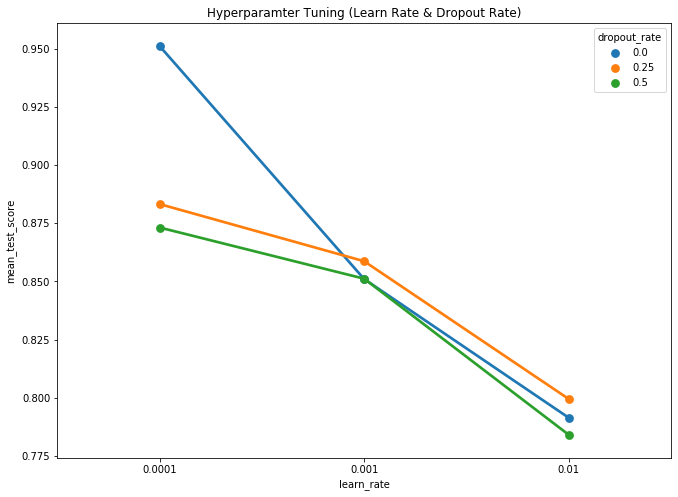

In [114]:
# Let's visualize our hyperparameter tuning!
import pandas as pd
import seaborn

def plotHyperParameters(cv_results, x, z, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + x
    col_z = 'param_' + z
    figurePlot, ax = plt.subplots(1, 1, figsize=(11, 8))
    seaborn.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Hyperparamter Tuning (Learn Rate & Dropout Rate)")
    ax.set_xlabel(x)
    ax.set_ylabel(metric)
    ax.legend(title=z)
    return figurePlot
figurePlot = plotHyperParameters(grid.cv_results_, 'learn_rate', 'dropout_rate')